# Tarefa 02 Módulo 05

O nosso projeto desta sequência de módulos do curso será um aprofundamento da demonstração sobre classificação de risco de crédito que vimos lá no comecinho. Pois recebemos uma base já montada pra nós. Tenha certeza de que ela passou por um longo processamento até ficar daquele jeito. Neste exercício vamos exercitar o que aprendemos nas ultimas aulas e montar a variável resposta da base do nosso projeto.

#### Marcação de bom e mau
O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de *default*. Podemos fazer longas discussões sobre o conceito de *default* com base em estudos e exigências regulatórias, para efeitos deste estudo, um cliente em *default* é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:
- **Maus** pagadores: são aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito. 
- **Bons** pagadores: são considerados todos os demais.
- **Excluídos**: Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre *inferência de rejeitados* que está fora do escopo deste exercício.

#### Bases disponíveis
Temos duas bases importantes aqui: uma de propostas, com diversas informações dos vários solicitantes de cartão de crédito, e uma base de pagamentos. A base de pagamentos será utilizada para identificar a ocorrência de *default*. A base de propostas tem diversas informações coletadas no momento da solicitação do crédito (isto é importante: qualquer informação posterior a essa data é impossível de ser coletada na aplicação do modelo e não pode ser utilizada).

As variáveis delas são:

Base de propostas - application_records.csv

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| CODE_GENDER| M = 'Masculino'; F = 'Feminino' |M/F|
| FLAG_OWN_CAR| Y = 'possui'; N = 'não possui' |Y/N|
| FLAG_OWN_REALTY| Y = 'possui'; N = 'não possui' |Y/N|
| CNT_CHILDREN| Quantidade de filhos |inteiro|
| AMT_INCOME_TOTAL| Annual income |inteiro|
| NAME_INCOME_TYPE|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| NAME_EDUCATION_TYPE| Nível de educação (ex: secundário, superior etc) |texto|
| NAME_FAMILY_STATUS | Estado civil (ex: solteiro, casado etc)| texto |
| NAME_HOUSING_TYPE | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| DAYS_BIRTH | Count backwards from current day (0), -1 means yesterday |inteiro|
| DAYS_EMPLOYED | Count backwards from current day (0), -1 means yesterday |inteiro|
| FLAG_MOBIL | Indica se possui celular (1 = sim, 0 = não) |binária|
| FLAG_WORK_PHONE | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| FLAG_PHONE | Indica se possui telefone (1 = sim, 0 = não) |binária|
| FLAG_EMAIL | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| OCCUPATION_TYPE | Occupation	 |Qualitativa|
| CNT_FAM_MEMBERS | quantidade de pessoas na residência |inteiro|

Base de pagamentos - pagamentos_largo.csv  

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| mes_00 a mes_24| faixa de atraso mês a mês do cliente <br>0: 1-29 days past due &nbsp;&nbsp;&nbsp;&nbsp; 1: 30-59 days past due <br />2: 60-89 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 3: 90-119 days overdue <br /> 4: 120-149 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 5: more than 150 days <br />C: paid off that month &nbsp;&nbsp;&nbsp;&nbsp; X: No loan for the month |Qualitativa|

#### Construindo a variável resposta
A base de pagamentos está em um formato de 'base larga'. Essa base possui informações de pagamentos do cliente mês a mês a partir do mês de aquisição do crédito (mês 0) até o vigésimo quarto mês após a aquisição do crédito (mês 24). Utilizaremos essa base para determinar se um proponente é considerado 'bom pagador' ou caso apresente atraso representativo, será considerado 'mau pagador'.

#### Base larga vs base longa
A base ser larga significa que há uma linha para cada cliente, e que as informações estarão nas colunas, em contraste com a 'base longa', em que haveria uma linha para cada combinação cliente/mês, uma coluna indicando o cliente, outra indicando o mês, e apenas uma coluna com a informação do atraso.

#### Tarefa 1) Marcar *default* no mês
Faça uma indicadora de se o cliente está em *default* em cada uma das marcações (mes_00 a mes_24). Dica: você pode utilizar o método ```.isin()``` do Pandas. Consulte a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) caso necessário.

#### Tarefa 2) 'bons' e 'maus' ao longo de todos os 24 meses de desempenho
Marque para cada cliente se ele teve pelo menos um episódio de *default* entre o mês 0 e o mês 24. Dica: o método ```sum()``` pode ajudar. Caso precise, consulte a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) e procure pelo argumento ```axis```, você viu outros métodos que possuem esse argumento também. Tendo o número de meses em default de cada cliente, basta marcar ```True``` para todos aqueles que possuem pelo menos 1 mês em *default* e ```False``` para os demais.

#### Tarefa 3) Marcando proponentes expostos ao risco de crédito
Marcando proponentes que se tornaram tomadores: lembre-se de que clientes que não adquiriram o cartão devem ser desconsiderados. A base de pagamentos possui apenas clientes que adquiriram cartão de crédito, então você pode selecionar somente os clientes da base de propostas que se encontram na base de pagamentos.

#### Tarefa 4) Consolidando as informações
Faça uma junção das informações da base de propostas com a variável de *default* que você acabou de construir. Talvez você consiga realizar a tarefa 3 e tarefa 4 em uma única linha de código ;)

#### Tarefa 5) Verificando
Faça uma contagem dos valores do *default* que você construiu. 

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
propostas = pd.read_csv('application_record.csv')
pg = pd.read_csv('pagamentos_largo.csv')

In [345]:
pg.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,...,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9
0,5001718,0,0,0,0,0,0,0,0,NaN,...,NaN,0,NaN,0,0,0,0,NaN,0,NaN
1,5001719,0,0,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
2,5001720,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,5001723,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN
4,5001726,0,0,C,C,C,C,C,C,C,...,C,C,C,0,0,0,C,C,C,C


In [346]:
# substiuindo os valores NaN por 0 - o novo data frame se chamará df

df = pg.fillna(0)
df.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,...,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9
0,5001718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5001719,0,0,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
2,5001720,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,5001723,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5001726,0,0,C,C,C,C,C,C,C,...,C,C,C,0,0,0,C,C,C,C


In [347]:
# criando uma cópia do df

df_cp = df.copy()

In [348]:
# substituir os valores 1, 2 e 6 como strings por zero (0)

df_cp = df_cp.replace(['1', '2', '6', 'C', 'X'], '0')


In [349]:
# convertendo tudo em float

df_cp = df_cp.astype(float)
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20937 entries, 0 to 20936
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20937 non-null  float64
 1   mes_0   20937 non-null  float64
 2   mes_1   20937 non-null  float64
 3   mes_10  20937 non-null  float64
 4   mes_11  20937 non-null  float64
 5   mes_12  20937 non-null  float64
 6   mes_13  20937 non-null  float64
 7   mes_14  20937 non-null  float64
 8   mes_15  20937 non-null  float64
 9   mes_16  20937 non-null  float64
 10  mes_17  20937 non-null  float64
 11  mes_18  20937 non-null  float64
 12  mes_19  20937 non-null  float64
 13  mes_2   20937 non-null  float64
 14  mes_20  20937 non-null  float64
 15  mes_21  20937 non-null  float64
 16  mes_22  20937 non-null  float64
 17  mes_23  20937 non-null  float64
 18  mes_24  20937 non-null  float64
 19  mes_3   20937 non-null  float64
 20  mes_4   20937 non-null  float64
 21  mes_5   20937 non-null  float64
 22

In [350]:
# pegando o exeplo de algumas colunas e vendo se sumiram os "não default"

df_cp["mes_22"].value_counts()
df_cp["mes_23"].value_counts()
df_cp["mes_10"].value_counts()

0.0    20868
5.0       49
3.0       11
4.0        9
Name: mes_10, dtype: int64

In [351]:
# criando nova coluna e inserindo os resultados

df_cp['risco'] = df_cp.drop('ID', axis=1).sum(axis=1)

In [352]:
# visualizando 

df_cp.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,...,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,risco
0,5001718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5001719.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5001720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5001723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5001726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
# convertendo coluna

df_cp['risco'] = df_cp['risco'].astype(int)
df_cp['risco'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20937 entries, 0 to 20936
Series name: risco
Non-Null Count  Dtype
--------------  -----
20937 non-null  int32
dtypes: int32(1)
memory usage: 81.9 KB


In [354]:
# mapear para saber os maiores valores de "risco"

df_cp['risco'].value_counts()

0      20724
3         50
12        13
6         13
52        11
7         11
22         9
17         9
4          7
11         7
42         7
5          7
32         6
62         5
27         5
79         4
90         3
75         3
82         3
57         3
10         3
47         2
120        2
84         2
26         2
72         2
13         2
19         2
25         2
40         2
55         2
107        1
67         1
20         1
77         1
112        1
68         1
15         1
87         1
16         1
24         1
8          1
9          1
30         1
65         1
Name: risco, dtype: int64

In [355]:
# substituindo os resultados positivos por default e os zeros por 'não default'

def substituir_valores(valor):
    if valor == 0:
        return 'não default'
    else:
        return 'default'
    

df_cp['risco'] = df_cp['risco'].apply(substituir_valores)

In [356]:
# contando os resultados de cada variante

quant_risco = df_cp['risco'].value_counts()
quant_risco


não default    20724
default          213
Name: risco, dtype: int64

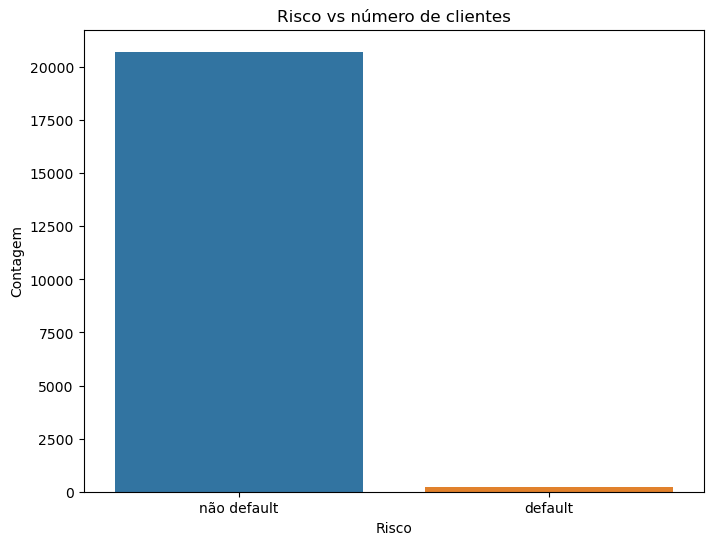

In [358]:
# fazendo um gráfico para melhor visualizar o risco

plt.figure(figsize=(8, 6))
sns.countplot(data=df_cp, x='risco')
plt.title('Risco vs número de clientes')
plt.xlabel('Risco')
plt.ylabel('Contagem')
plt.show()

    


In [386]:
# vendo  

propostas.head()

# fatiando o DF para pegar somente o que interessa (index, ID e risco)

df_cp_new = df_cp.iloc[:, [0,-1]]

# juntando com o inner join - só para pegar os dados que existem em ambas as bases

df_merge = propostas.merge(df_cp_new, on = 'ID', how = 'inner')

In [387]:
df_cp_new.head()

,ID,risco
0,5001718.0,não default
1,5001719.0,não default
2,5001720.0,não default
3,5001723.0,não default
4,5001726.0,não default


In [388]:
df_merge.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,risco
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,não default
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,não default
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,não default
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,não default
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,não default


In [393]:
# verificação

print(f'o banco de dados propostas possui {propostas.shape[0]}, enquanto o outro tem {df_cp_new.shape[0]} itens.\nJá a união dos dois conunto de dados possui {df_merge.shape[0]} linhas.')

o banco de dados propostas possui 438557, enquanto o outro tem 20937 itens.
Já a união dos dois conunto de dados possui 16650 linhas.
